In [1]:
from PIL import Image
from IPython import display
import numpy as np
import cv2
import copy
import time

testdata = """....#
#..#.
#..##
..#..
#...."""

def ld(m):
    m = m.split('\n')
    m = [['#' if c=='#' else '.' for c in l] for l in m]
    return m

def pretty(m):
    w = len(m[0])
    h = len(m)
    
    i=np.zeros([h,w,3]).astype(np.uint8)
    for y in range(h):
        for x in range(w):
            if m[y][x] == '#':
                i[y,x,:]=[0,255,0]
            elif m[y][x] == '.':
                pass
            else:
                assert(0)
    F=20
    i = cv2.resize(i, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    display.clear_output(wait=True)
    display.display(Image.fromarray(i))
    
def evolve(m):
    w = len(m[0])
    h = len(m)
    m2 = copy.deepcopy(m)
    for y in range(h):
        for x in range(w):
            #count neighbours
            n=0
            for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
                xx = x + dx
                yy = y + dy
                if xx >= 0 and xx < w:
                    if yy >= 0 and yy < h:
                        if m[yy][xx]=='#':
                            n+=1
            if m[y][x]=='#':
                if not n in [1]:
                    m2[y][x]='.'
                else:
                    m2[y][x]='#'
            elif m[y][x]=='.':
                if n in [1,2]:
                    m2[y][x]='#'
    return m2
                    
def ser(m):
    return "".join(["".join(l) for l in m])

def bd(m):
    w = len(m[0])
    h = len(m)
    bd = 0
    v = 1
    for y in range(h):
        for x in range(w):
            if m[y][x]=='#':
                bd += v
            v*=2
                
    return bd

def txt(m):
    for l in m:
        print("".join(l))

def p1(d):
    m = ld(d)
    #print(m)
    M={}
    steps=0
    #M[ser(m)]=steps
    while(1):
        pretty(m)
        print(steps)
        #time.sleep(0.2)
        m = evolve(m)
        s = ser(m)
        if s in M:
            pretty(m)
            print(txt(m))
            print(steps)
            break
        M[s]=1
        steps += 1
        #time.sleep(0.1)
    #print(ser(m))
    
    return bd(m)
    
    




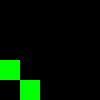

.....
.....
.....
#....
.#...
None
85
test1:  2129920 2129920


In [2]:
    
print("test1: ", p1(testdata), 2129920)





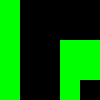

#....
#....
#..##
#..##
#..#.
None
47
part1:  10282017 10282017


In [3]:

print("part1: ", p1(open("24.txt").read()), 10282017)




In [4]:
def pretty2(b):
    w=5
    h=5
    i=np.zeros([h,w,3]).astype(np.uint8)
    for x,y,d in b.keys():
        if d==0:
            i[y,x,:]=[0,255,0]
            
    F=20
    i = cv2.resize(i, fx=F, fy=F, dsize=(0, 0), interpolation=cv2.INTER_NEAREST)
    display.clear_output(wait=True)
    display.display(Image.fromarray(i))

#depth starts from zero on outmost level
def neighbours(b,x,y,d):
    tch=[]
    n=0
    if 1: # not (x==2 and y==2):
        for dx,dy in [(1,0),(0,1),(-1,0),(0,-1)]:
            
        
            if x==3 and y==2 and dx==-1:
                for i in range(5):   
                    c = (4,i,d+1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif x==1 and y==2 and dx==1:
                for i in range(5):    
                    c = (0,i,d+1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif y==3 and x==2 and dy==-1:
                for i in range(5):     
                    c = (i,4,d+1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif y==1 and x==2 and dy==1:
                for i in range(5):   
                    c = (i,0,d+1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
        
            elif x==0 and dx==-1:
                if 1 or d>0:
                    c = (1,2,d-1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif x==4 and dx==1:
                if 1 or d>0:
                    c = (3,2,d-1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif y==0 and dy==-1:
                if 1 or d>0:
                    c = (2,1,d-1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif y==4 and dy==1:
                if 1 or d>0:
                    c = (2,3,d-1)
                    if c in b:
                        n+=1
                    else:
                        tch.append(c)
            elif x==2 and y==2: 
                
                assert(0)
            else:
                #print(tch)
                xx=x+dx
                yy=y+dy
                c=(xx,yy,d)
                if c in b:
                    n+=1
                else:    
                  
                    tch.append(c)
    
    return n,list(set(tch))
    

    
def evolve2(b):
    b2={}
    p=[]
    for e in b:
        x,y,d=e
        if x==2 and y==2:
            assert(0)
        nn,tch=neighbours(b,x,y,d)
        if nn in [1]:
            b2[e]=1
        p+=tch
    for e in list(set(p)):
        x,y,d=e
        if x==2 and y==2:
            assert(0)  
        nn,tch=neighbours(b,x,y,d)
        if nn in [1,2]:
            b2[e]=1
    return b2

def print2(bugs):
    for y in range(5):
        l=""
        for x in range(5):
            l+='#' if (x,y,0)in bugs else ' '
        print(l)

def t2b(m):
    bugs={}
    for y in range(5):
        for x in range(5):
            if m[y][x]=='#':
                bugs[(x,y,0)]=1
    return bugs

def dpt(bugs):
    return max([k[2] for k in bugs.keys()])

def p2(d,nn):
    bugs = t2b(ld(d))
    
    
    n=0
    while 1:
        if n!=0:
            bugs=evolve2(bugs)
        print(n)
        pretty2(bugs)
        print2(bugs)
        print(len(bugs.keys()),dpt(bugs))
        
        n+=1
        if n==nn+1:
            break
        
    
    return len(bugs.keys())
   
    
    
    

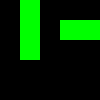

 #   
 # ##
 #   
     
     
99 5
test2:  99 99


In [5]:
print("test2: ", p2(testdata,10), 99)



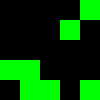

    #
   # 
     
##   
 ## #
2065 100
part2:  2065 2065


In [6]:
print("part2: ", p2(open("24.txt").read(),200), 2065)

